<a href="https://colab.research.google.com/github/mjfoster1313/Matts-Repo/blob/main/Homework7_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 16.6.1 Loading the MNIST Dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

* **`load_data` function** loads **training** and **testing sets**

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## 16.6.2 Data Exploration
* Check dimensions of the **training set images (`X_train`)**, **training set labels (`y_train`)**, **testing set images (`X_test`)** and **testing set labels (`y_test`)**:

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

### Visualizing Digits
* Display 24 MNIST training set images

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
# sns.set(font_scale=2)

### Visualizing Digits
* Run cell several times to view different digits and see **why handwritten digit recognition is a challenge**

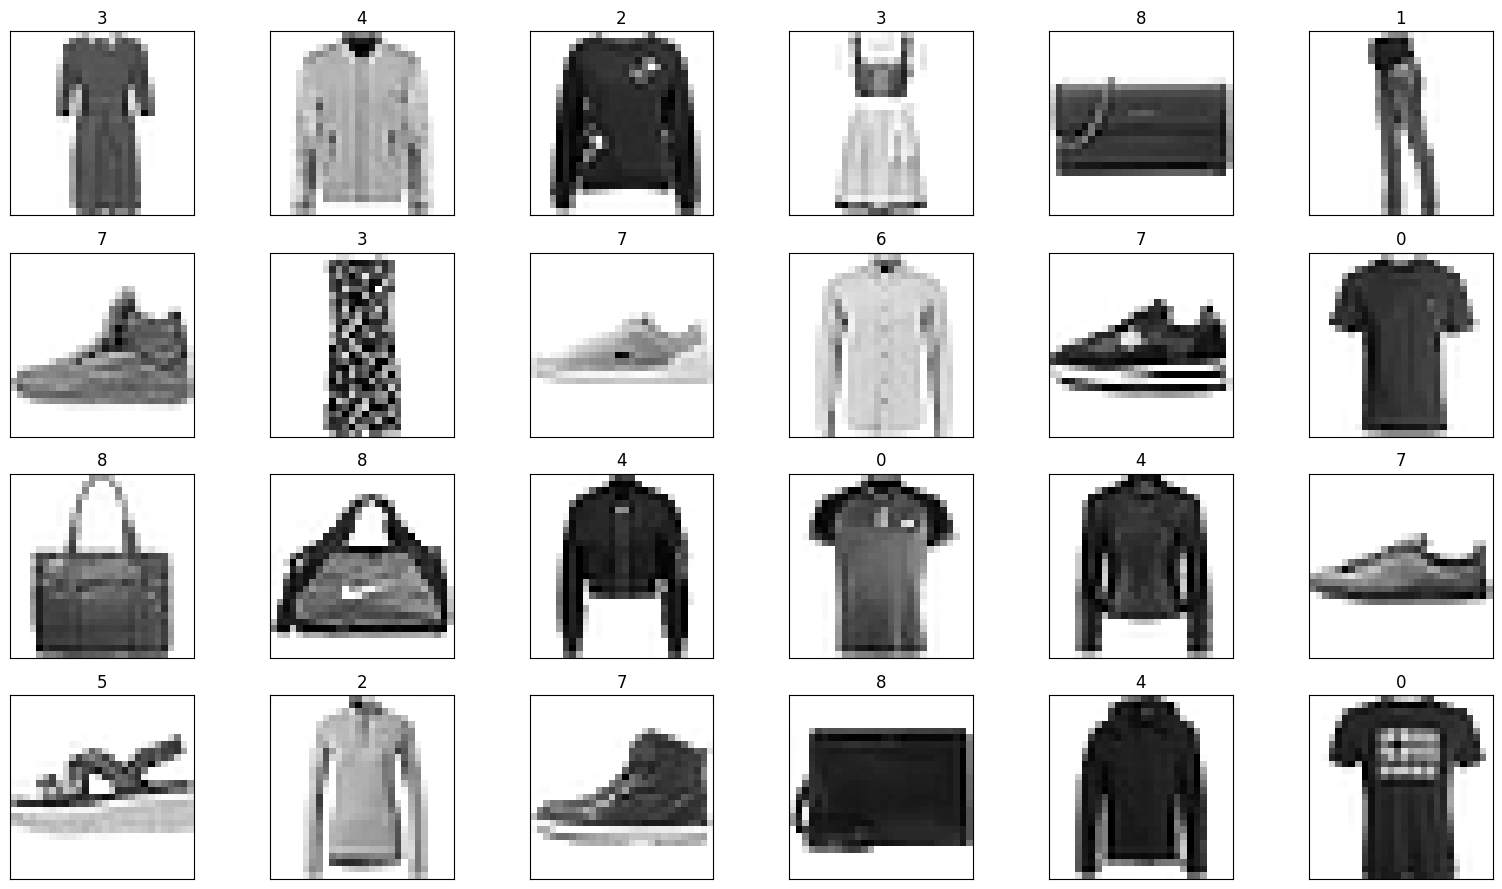

In [ ]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

## 16.6.3 Data Preparation
* **Scikit-learn’s bundled datasets** were **preprocessed** into the **shapes its models required**
* MNIST dataset **requires some preparation** for use in a Keras convnet

### Reshaping the Image Data (cont.)
* NumPy array method `reshape` receives a tuple representing the new shape

In [ ]:
X_train = X_train.reshape((-1, 28, 28, 1))

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test = X_test.reshape((-1, 28, 28, 1))

In [ ]:
X_test.shape

(10000, 28, 28, 1)

### Normalizing the Image Data
* **Numeric feature values** may vary widely
* Deep learning networks **perform better** on data that's **normalized** into
    * the range **0.0-1.0**, or
    * a range for which the data’s **mean is 0.0** and its **standard deviation is 1.0**
        * S. Ioffe and Szegedy, C., “Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift.” https://arxiv.org/abs/1502.03167
* Divide **each pixel** value by **255** to normalize into the range **0.0-1.0**:

In [ ]:
X_train = X_train.astype('float32') / 255

In [ ]:
X_test = X_test.astype('float32') / 255

### One-Hot Encoding: Convert Labels to Categorical Data
* **Predictions** for each digit will be an **array of 10 probabilities**
* To **evaluate model accuracy**, Keras **compares predictions to dataset's labels**
    * Both must have the **same shape**
    * MNIST labels are **individual integers 0-9**
* Must **transform labels** into **categorical data arrays** matching the **prediction format**
* Use [**one-hot encoding**](https://en.wikipedia.org/wiki/One-hot) to convert labels from integers into 10-element **arrays of 1.0s and 0.0s**
    * **only one element is 1.0** and the **rest are 0.0s**
* Categorical representation of a **7**
> <pre>[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, <strong>1.0</strong>, 0.0, 0.0]</pre>
* **`tensorflow.keras.utils`** function **`to_categorical`** performs **one-hot encoding**

### One-Hot Encoding: Convert Labels to Categorical Data (cont.)
* Transform **`y_train`** and **`y_test`** into **two-dimensional arrays of categorical data**

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_train[0]  # one sample’s categorical data

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
y_test = to_categorical(y_test)

In [ ]:
y_test.shape

(10000, 10)

## 16.6.4 Creating the Neural Network
* Configure a **convolutional neural network**
* **`Sequential` model** stacks layers to **execute sequentially**
    * **output** of one layer becomes **input** to the next
    * **Feed-forward network**
    * Later, you’ll see that not all layers feed output to the next layer

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
cnn = Sequential()

### Adding Layers to the Network
* A typical **convnet** consists of
	* **input layer** that receives **training samples**
	* **hidden layers** that **learn** from training samples
	* **output layer** that **produces predictions**
* Import layer classes for a basic **convnet**

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

### Adding a Convolution Layer
* **`Conv2D`** implements the convolution layer

In [ ]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
               input_shape=(28, 28, 1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [ ]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
cnn.add(Flatten())

In [ ]:
cnn.add(Dense(units=128, activation='relu'))

In [ ]:
cnn.add(Dense(units=10, activation='softmax'))

### Printing the Model’s Summary
* Use model’s **`summary`** method
* Note layers' **output shapes** and **numbers of parameters**
* **Parameters** are the **weights** that the network **learns** during training [\[1\]](https://hackernoon.com/everything-you-need-to-know-about-neural-networks-8988c3ee4491),[\[2\]](https://www.kdnuggets.com/2018/06/deep-learning-best-practices-weight-initialization.html)
* **Relatively small network**, but needs to **learn nearly 500,000 parameters**!
	* This is for **tiny images** that are less than 1/4 the size of icons on smartphone home screens
	* Imagine how many features a network would have to learn to process high-resolution 4K video frames or the super-high-resolution images produced by today’s digital cameras
* In the **`Output Shape`** column, **`None`** means the model does not know in advance how many training samples you’re going to provide

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

### Visualizing a Model’s Structure
* Use the **`plot_model` function** from module `tensorflow.keras.utils`

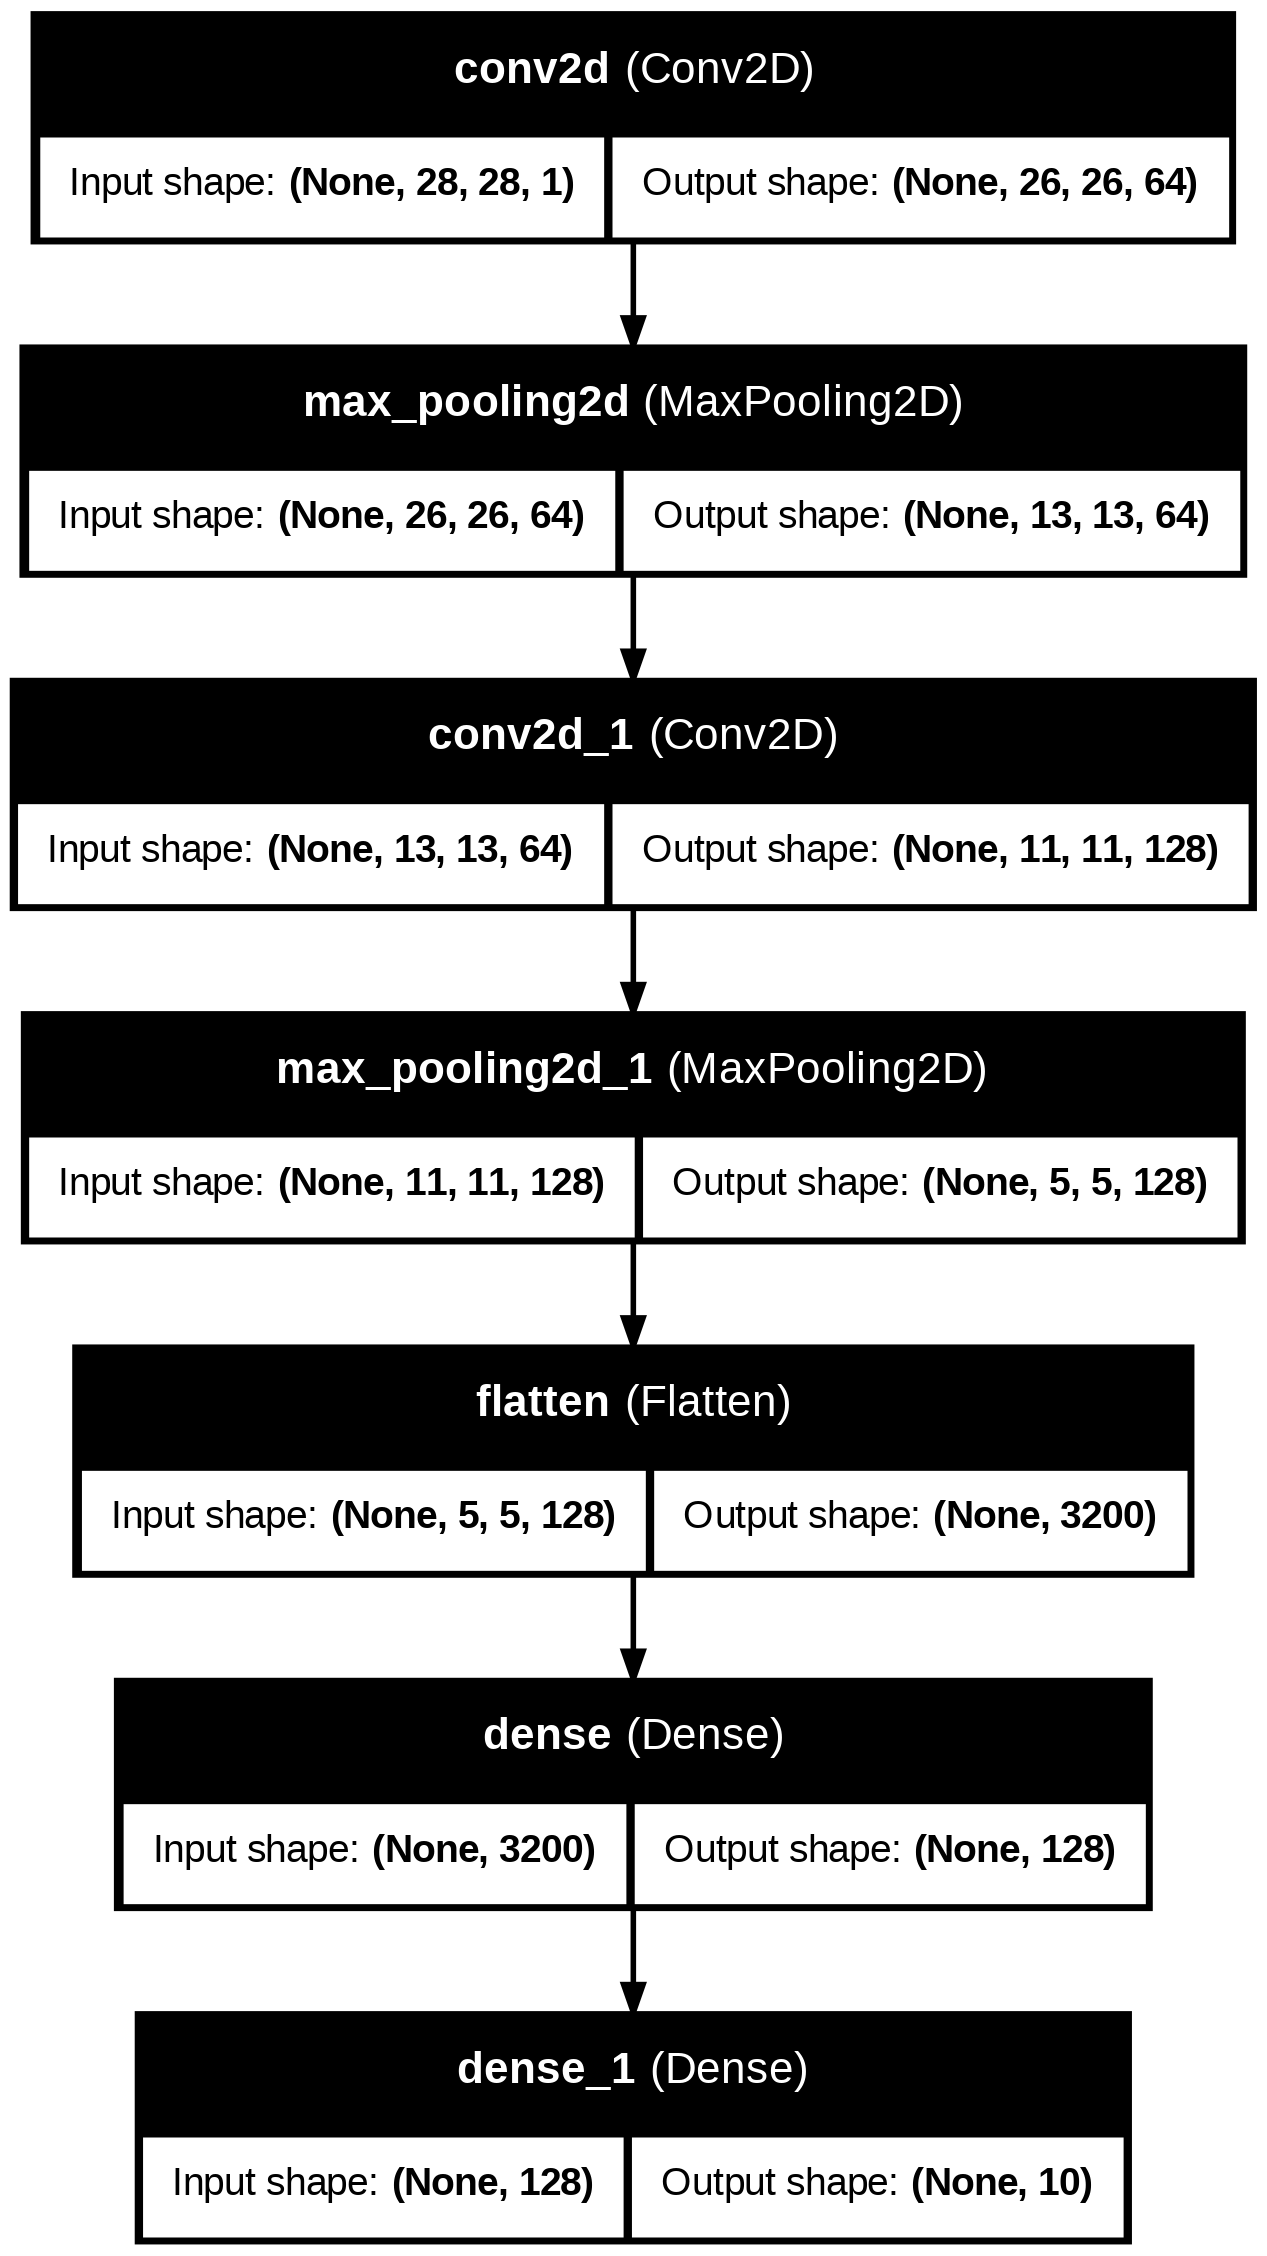

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')  # display resulting image in notebook

### Compiling the Model
* Complete the model by calling its **`compile` method**

In [ ]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

## 15.6.5 Training and Evaluating the Model
* **Train a Keras model** by calling its **`fit` method**
```python
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
```
* **`epochs=5`**&mdash;train neural networks iteratively over time
    * Each **`epoch`** processes **every training dataset sample** once
    * **Hyperparameter** that may need tuning
* **`batch_size=64`**&mdash;**number of samples to process at a time**
    * Most models specify a **power of 2 from 32 to 512**
* [**`validation_split=0.1`**&mdash;model should reserve the **last** 10% of the training samples for validation](https://keras.io/getting-started/faq/#how-is-the-validation-split-computed)
	* After each **epoch**, model uses validation samples to **make predictions** and display the **validation loss and accuracy**
    * Use **tune your layers** and the **`fit` method’s hyperparameters**, or possibly change the **layer composition** of your model
    * Can specify **separate validation data** with **`validation_data` argument**

## 15.6.5 Training and Evaluating the Model (cont.)
* Model took about 5 minutes to train on our CPU.
* **Lecture note: Play convnet timelapse video here**

In [ ]:
cnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9361 - loss: 0.1687 - val_accuracy: 0.9207 - val_loss: 0.2228
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9448 - loss: 0.1486 - val_accuracy: 0.9198 - val_loss: 0.2303
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9523 - loss: 0.1282 - val_accuracy: 0.9165 - val_loss: 0.2514
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9599 - loss: 0.1076 - val_accuracy: 0.9112 - val_loss: 0.2916
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9646 - loss: 0.0948 - val_accuracy: 0.9147 - val_loss: 0.2709
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9697 - loss: 0.0803 - val_accuracy: 0.9127 - val_loss: 0.2702
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9745 - loss: 0.0689 - val_accuracy: 0.9117 - val_loss: 0.3026
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9794 - loss: 0.0577 - val_accuracy: 0.

## 15.6.5 Training and Evaluating the Model (cont.)
* As training proceeds, **`fit`** shows the **progress** of each **epoch**, **how long** the epoch took to execute, and the **evaluation metrics** for that epoch
* Impressive **training accuracy (`acc`**) and **validation accurracy (`acc`)**, given that **we have not yet tried to tune the hyperparameters** or **tweak the number and types of the layers**

### Evaluating the Model on Unseen Data with Model’s **`evaluate` Method**

In [ ]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9008 - loss: 0.4625


In [ ]:
loss

0.43803349137306213

In [ ]:
accuracy

0.9053999781608582

* Without tuning, our **convnet model** is **99+% accurate** for **unseen data samples**
    * Can find models online that predict MNIST with even **higher accuracy**
    * **Experiment** with different numbers of layers, types of layers and layer parameters and observe how those changes affect your results

### Making Predictions with the Model’s **`predict` Method**

In [ ]:
predictions = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


* The first digit should be a 7 (shown as `1.` at index 7)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

* Check the **probabilities** returned by **`predict`** for **first test sample**

In [ ]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000001137%
1: 0.0000007138%
2: 0.0000000127%
3: 0.0000000000%
4: 0.0000001555%
5: 0.0000775537%
6: 0.0000000000%
7: 0.0000066515%
8: 0.0000004820%
9: 99.9999165535%


### Locating the Incorrect Predictions
* View some **incorrectly predicted images** to get a sense of digits **our model has trouble with**
	* If the model always mispredicts 8s, perhaps we need more 8s in our training data
* To determine whether a prediction was correct, compare the index of the largest probability in `predictions[0]` to the index of the element containing **`1.0` in `y_test[0]`**
	* If **indices** are the same, **prediction was correct**

### Locating the Incorrect Predictions (cont.)
* **Reshape the samples** from the shape `(28, 28, 1)` that Keras required for learning back to `(28, 28)`, which **Matplotlib requires to display the images**

In [ ]:
images = X_test.reshape((10000, 28, 28))

In [ ]:
incorrect_predictions = []

* In the following snippet, **`p`** is the **predicted value array**, and **`e`** is the **expected value array**
* **NumPy’s `argmax` function** determines **index** of an array’s **highest valued element**

In [ ]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [ ]:
len(incorrect_predictions)  # number of incorrect predictions

946

### Visualizing Incorrect Predictions
* **Display 24 of the incorrect images** labeled with each image’s index, predicted value (`p`) and expected value (`e`)
* Before reading the **expected values**, look at each digit and write down what digit you think it is
* This is an important part of **getting to know your data**
<!--![24 incorrectly predicted digit images](./ch15images/incorrect24.png "24 incorrectly predicted digit images")-->



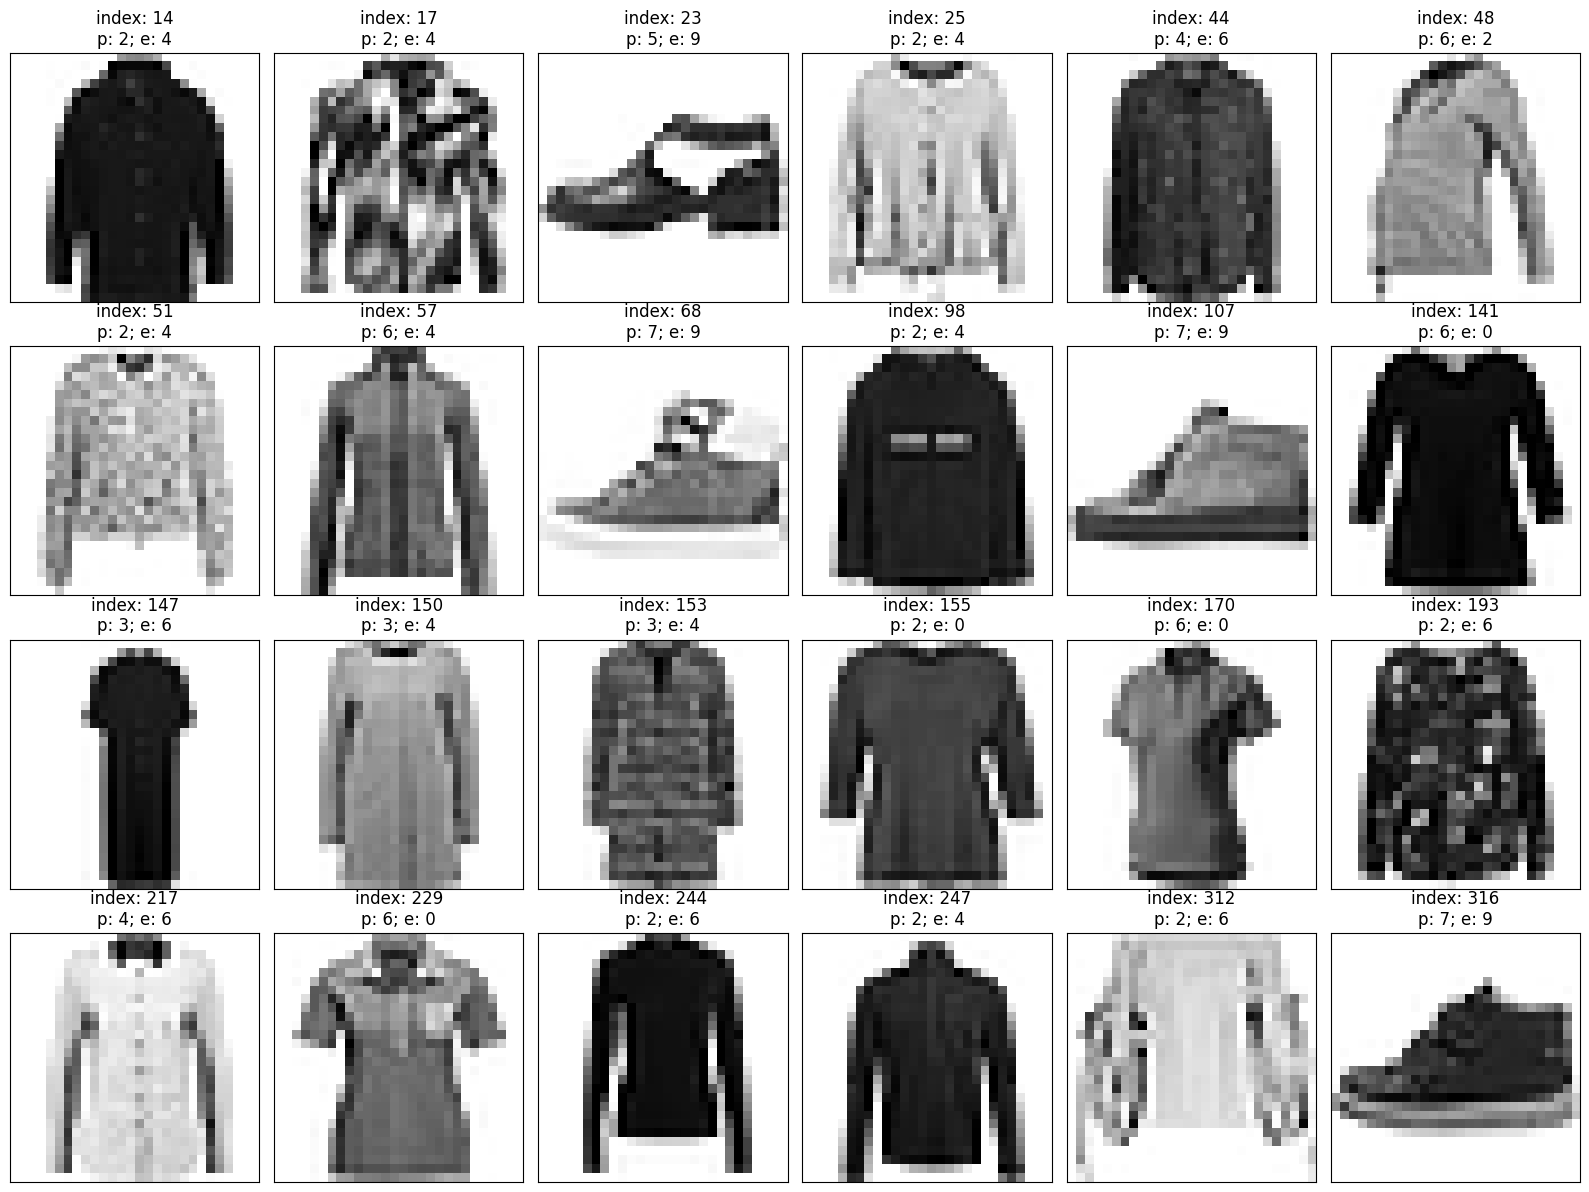

In [ ]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

### Displaying the Probabilities for Several Incorrect Predictions
* The following function displays the probabilities for the specified prediction array:

In [ ]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

* **Instructor Note:** Change the index values in the next three cells to specific indicies listed in the image output above

In [ ]:
display_probabilities(predictions[14])

0: 0.0000011929%
1: 0.0000018919%
2: 51.7710924149%
3: 0.0001375066%
4: 48.0483770370%
5: 0.0000000351%
6: 0.1803372521%
7: 0.0000013457%
8: 0.0000000756%
9: 0.0000525977%


In [ ]:
display_probabilities(predictions[244])

0: 0.0059816710%
1: 0.0000004100%
2: 96.3500499725%
3: 0.0050636299%
4: 2.0762020722%
5: 0.0000001823%
6: 1.5626454726%
7: 0.0000000615%
8: 0.0000615029%
9: 0.0000034856%


In [ ]:
display_probabilities(predictions[23])

0: 0.0000000000%
1: 0.0000000000%
2: 0.0000000000%
3: 0.0000000000%
4: 0.0000000000%
5: 100.0000000000%
6: 0.0000000000%
7: 0.0000000000%
8: 0.0000000000%
9: 0.0000001154%


The training time for the fashion-MNIST was faster than for the MNIST.  The training time for the first 5 epochs of the fashion-MNIST was 18 seconds whereas the MNIST training time was 28 seconds.  Runtime type was changed to T4 GPU.